In [3]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [4]:
table_1 = pd.read_csv('../../데이터/Table/table_1.csv')
table_2 = pd.read_csv('../../데이터/Table/table_2.csv')
table_3 = pd.read_csv('../../데이터/Table/table_3.csv')

table_merge = pd.merge(table_1, table_3, how='left', on='aid')
table_merge = pd.merge(table_merge, table_2, how='left', on='did')

table_merge['gu'] = table_merge['location'].str.split().str[1]
table_merge['dong'] = table_merge['location'].str.split().str[2]

### 아파트 실거래가

In [5]:
# 구별 평균, 표준편차
gu = table_merge.groupby('gu')['price'].agg(['mean', 'std'])
# 구별 평균의 평균
gu_mean_mean = gu['mean'].mean()
# 구별 표준편차의 평균
gu_std_mean = gu['std'].mean()

print(gu_mean_mean, gu_std_mean)

62619.943741345465 26850.41121793319


In [6]:
# 동별 평균, 표준편차
dong = table_merge.groupby(by='dong')['price'].agg(['mean', 'std'])
# 동별 평균의 평균
dong_mean_mean = dong['mean'].mean()
# 동별 표준편차의 평균
dong_std_mean = dong['std'].mean() - 3000

print(dong_mean_mean, dong_std_mean)

64377.87688959049 21682.241935446007


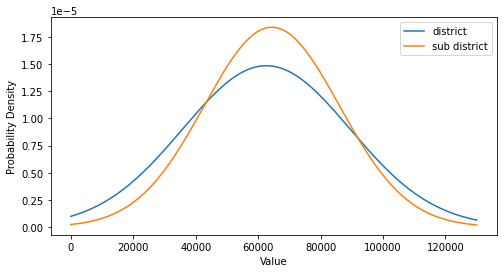

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

x = np.linspace(0, 130000, 1000)
y_gu = norm.pdf(x, gu_mean_mean, gu_std_mean)
y_dong = norm.pdf(x, dong_mean_mean, dong_std_mean)

plt.figure(figsize=(8, 4))
plt.plot(x, y_gu, label='district')
plt.plot(x, y_dong, label='sub district')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.savefig('../../데이터/Figure/fig_1.jpg')

### 경제지표

In [9]:
table_2['date'] = pd.to_datetime(table_2[['year', 'month']].assign(DAY=1))

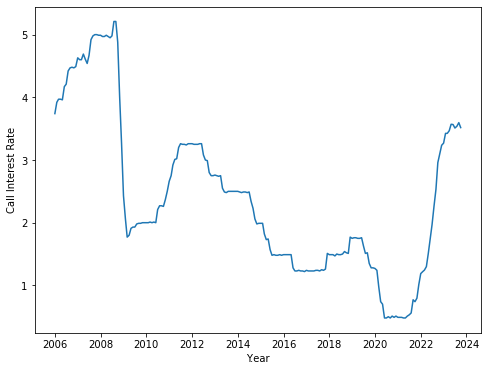

In [11]:
plt.figure(figsize=(8, 6))
plt.plot(table_2['date'], table_2['call_rate'])
plt.xlabel('Y.ear')
plt.ylabel('Call Interest Rate')
plt.savefig('../../데이터/Figure/fig_2.jpg')

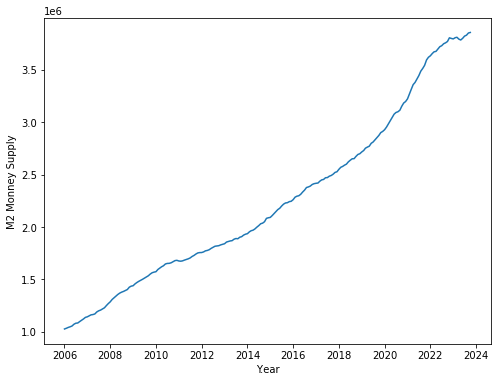

In [10]:
plt.figure(figsize=(8, 6))
plt.plot(table_2['date'], table_2['m2'])
plt.xlabel('Y.ear')
plt.ylabel('M2 Monney Supply')
plt.savefig('../../데이터/Figure/fig_3.jpg')